## AP3 - Parte 1 - Lógica Fuzzy
### **Autores:**
* #### Airton Silva Mesquita Filho - 408338
* #### Thiago Lima de Aguiar - 371872

#### **Professor:** José Almeida do Nascimento

#### **Exercício:** Exercício 01 - LOGICAFUZZY2017F.pdf

##### **Problema:**
##### Calcular o valor do risco considerando quantidade de dinheiro igual a 50% e quantidade de pessoal igual a 60%



In [13]:
# Instalando as bibliotecas necessárias
!pip install networkx==2.3
!pip install scikit-fuzzy

In [14]:
# Importa as bibliotecas que serão utilizadas
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

## 1. Fuzzificação

**Variáveis:** 

> Dinheiro
* Inadequado
* Médio
* Adequado

> Pessoal
* Alto
* Baixo

> Risco
* Pequeno
* Médio
* Alto


In [15]:
# Variáveis Fuzzy do Problema
dinheiro = ctrl.Antecedent(np.arange(0, 101, 1), 'Dinheiro')
pessoal = ctrl.Antecedent(np.arange(0, 101, 1), 'Pessoal')
risco = ctrl.Consequent(np.arange(0, 101, 1), 'Risco')

In [16]:
# Funções de pertinência
dinheiro['Inadequado'] = fuzz.trapmf(dinheiro.universe, [0, 0, 30,50])
dinheiro['Medio'] = fuzz.trimf(dinheiro.universe,[30,50,70])
dinheiro['Adequado'] = fuzz.trapmf(dinheiro.universe[::-1], [0,0,30,50])

pessoal['Baixo'] = fuzz.trapmf(pessoal.universe, [0, 0,30,70])
pessoal['Alto'] = fuzz.trapmf(pessoal.universe[::-1], [0, 0, 30,70])

risco['Pequeno'] = fuzz.trapmf(risco.universe, [0, 0, 40,60])
risco['Medio'] = fuzz.trimf(risco.universe, [40,60,80])
risco['Alto'] = fuzz.trapmf(risco.universe[::-1], [0,0,20,40])

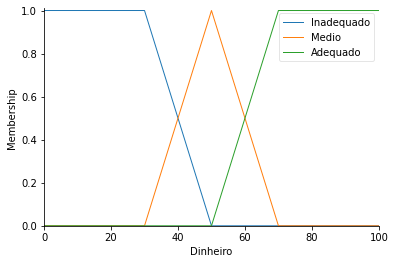

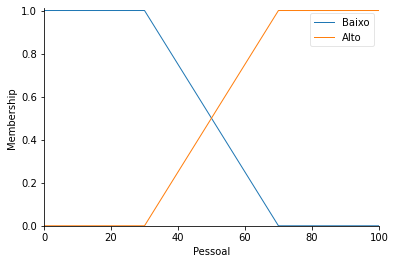

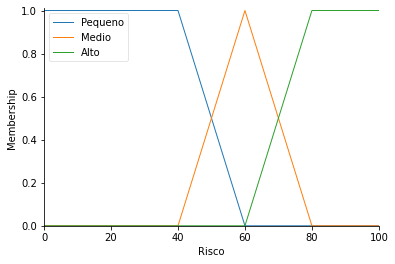

In [17]:
# Gráficos das funções de pertinência para cada variável
dinheiro.view()
pessoal.view()
risco.view()

## 2. Inferência Fuzzy

### Regras de Decisão

> **SE** A quantidade de dinheiro é ADEQUADA **OU** A quantidade de pessoal é BAIXA **ENTÃO** O risco é PEQUENO

> **SE** A quantidade de dinheiro é MÉDIO **E** A quantidade de pessoal é ALTA **ENTÃO** O risco é MÉDIO

> **SE** A quantidade de dinheiro é INADEQUADA **ENTÃO** O risco é ALTO

In [18]:
# Criação das regras Fuzzy
r1 = ctrl.Rule(dinheiro['Adequado'] | pessoal['Baixo'], risco['Pequeno'])
r2 = ctrl.Rule(dinheiro['Medio'] & pessoal['Alto'], risco['Medio'])
r3 = ctrl.Rule(dinheiro['Inadequado'], risco['Alto'])

In [19]:
# Iniciando a simulação das regras definidas
risco_ctrl_sys = ctrl.ControlSystem([r1, r2, r3])
risco_simulator = ctrl.ControlSystemSimulation(risco_ctrl_sys)

# Testando as regras criadas
risco_simulator.input['Dinheiro'] = 50
risco_simulator.input['Pessoal'] = 60
risco_simulator.compute()

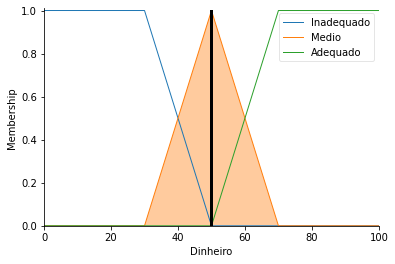

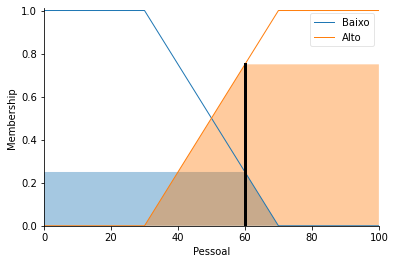

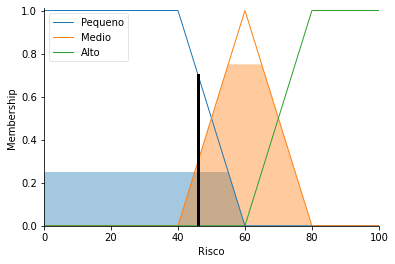

In [20]:
# Gerando as visões das regras
dinheiro.view(sim=risco_simulator)
pessoal.view(sim=risco_simulator)
risco.view(sim=risco_simulator)

## 3. Desfuzzificação


In [22]:
# Resultado da Desfuzzificação
print(risco_simulator.output['Risco'])

45.99290780141847


Obtivemos um resultado de 45,99% na desfuzzificação a partir das inferências utilizadas.